In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
import pprint

In [2]:
file1 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate19901999.csv")
file2 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
file3 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
file4 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
file5 = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df = pd.concat([file1, file2, file3, file4, file5], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
923174,2024-04,YISHUN,5 ROOM,502D,YISHUN ST 51,07 TO 09,112.0,Improved,2018,725000.0,92 years 10 months
923175,2024-04,YISHUN,5 ROOM,647,YISHUN ST 61,07 TO 09,121.0,Improved,1987,668888.0,62 years 01 month
923176,2024-04,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,1080000.0,67 years 03 months
923177,2024-04,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,Apartment,1988,830000.0,63 years 04 months


In [3]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [4]:
df['flat_type'] = df['flat_type'].apply(lambda x: 'MULTI GENERATION' if x == 'MULTI-GENERATION' else x)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
923174,2024-04,YISHUN,5 ROOM,502D,YISHUN ST 51,07 TO 09,112.0,Improved,2018,725000.0,92 years 10 months
923175,2024-04,YISHUN,5 ROOM,647,YISHUN ST 61,07 TO 09,121.0,Improved,1987,668888.0,62 years 01 month
923176,2024-04,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,1080000.0,67 years 03 months
923177,2024-04,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,Apartment,1988,830000.0,63 years 04 months


In [5]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [6]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [7]:
df['flat_model'] = df['flat_model'].apply(lambda x: x.upper())
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
923174,2024-04,YISHUN,5 ROOM,502D,YISHUN ST 51,07 TO 09,112.0,IMPROVED,2018,725000.0,92 years 10 months
923175,2024-04,YISHUN,5 ROOM,647,YISHUN ST 61,07 TO 09,121.0,IMPROVED,1987,668888.0,62 years 01 month
923176,2024-04,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,APARTMENT,1992,1080000.0,67 years 03 months
923177,2024-04,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,APARTMENT,1988,830000.0,63 years 04 months


In [8]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
       'MODEL A2', 'DBSS', 'TYPE S1', 'TYPE S2', 'PREMIUM APARTMENT LOFT',
       '3GEN'], dtype=object)

In [9]:
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m').dt.to_period('M')
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
923174,2024-04,YISHUN,5 ROOM,502D,YISHUN ST 51,07 TO 09,112.0,IMPROVED,2018,725000.0,92 years 10 months
923175,2024-04,YISHUN,5 ROOM,647,YISHUN ST 61,07 TO 09,121.0,IMPROVED,1987,668888.0,62 years 01 month
923176,2024-04,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,APARTMENT,1992,1080000.0,67 years 03 months
923177,2024-04,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,APARTMENT,1988,830000.0,63 years 04 months


In [10]:
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
923174,4,YISHUN,5 ROOM,502D,YISHUN ST 51,07 TO 09,112.0,IMPROVED,2018,725000.0,92 years 10 months,2024
923175,4,YISHUN,5 ROOM,647,YISHUN ST 61,07 TO 09,121.0,IMPROVED,1987,668888.0,62 years 01 month,2024
923176,4,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,APARTMENT,1992,1080000.0,67 years 03 months,2024
923177,4,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,APARTMENT,1988,830000.0,63 years 04 months,2024


In [11]:
df['minimum_storey'] = df['storey_range'].str.split(' TO ').str[0].astype(int)
df['maximum_storey'] = df['storey_range'].str.split(' TO ').str[1].astype(int)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,minimum_storey,maximum_storey
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,10,12
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,4,6
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,10,12
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990,7,9
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923174,4,YISHUN,5 ROOM,502D,YISHUN ST 51,07 TO 09,112.0,IMPROVED,2018,725000.0,92 years 10 months,2024,7,9
923175,4,YISHUN,5 ROOM,647,YISHUN ST 61,07 TO 09,121.0,IMPROVED,1987,668888.0,62 years 01 month,2024,7,9
923176,4,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,APARTMENT,1992,1080000.0,67 years 03 months,2024,7,9
923177,4,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,APARTMENT,1988,830000.0,63 years 04 months,2024,4,6


In [12]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
year                        0
minimum_storey              0
maximum_storey              0
dtype: int64

In [13]:
df['remaining_lease'] = np.where(df['remaining_lease'].isna()==True, 'Not Specified', df['remaining_lease'])
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,minimum_storey,maximum_storey
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,Not Specified,1990,10,12
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,Not Specified,1990,4,6
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,Not Specified,1990,10,12
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,Not Specified,1990,7,9
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,Not Specified,1990,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923174,4,YISHUN,5 ROOM,502D,YISHUN ST 51,07 TO 09,112.0,IMPROVED,2018,725000.0,92 years 10 months,2024,7,9
923175,4,YISHUN,5 ROOM,647,YISHUN ST 61,07 TO 09,121.0,IMPROVED,1987,668888.0,62 years 01 month,2024,7,9
923176,4,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,APARTMENT,1992,1080000.0,67 years 03 months,2024,7,9
923177,4,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,APARTMENT,1988,830000.0,63 years 04 months,2024,4,6


In [14]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
minimum_storey         0
maximum_storey         0
dtype: int64

In [15]:
def skewness_plot(df, *column):
    nrow = len(column)
    plot_no = 0
    
    for col_name in column:
        if  'sqrt' in col_name:
            title = "After Treatment"
        else:
            title = "Before Treatment"

        plt.figure(figsize=(16, 8))

        plot_no += 1
        plt.subplot(nrow, 3, plot_no)
        sns.boxplot(x=col_name, data=df)
        plt.title('Boxplot - '+ title)

        plot_no += 1
        plt.subplot(nrow, 3, plot_no)
        sns.distplot(df[col_name])
        plt.title(f'Distplot - Skewness: {skew(df[col_name])}')

        plot_no += 1
        plt.subplot(nrow, 3, plot_no)
        sns.violinplot(x=col_name, data=df)
        plt.title('Violinplot - ' + title)

    plt.tight_layout()
    
    return plt.show()

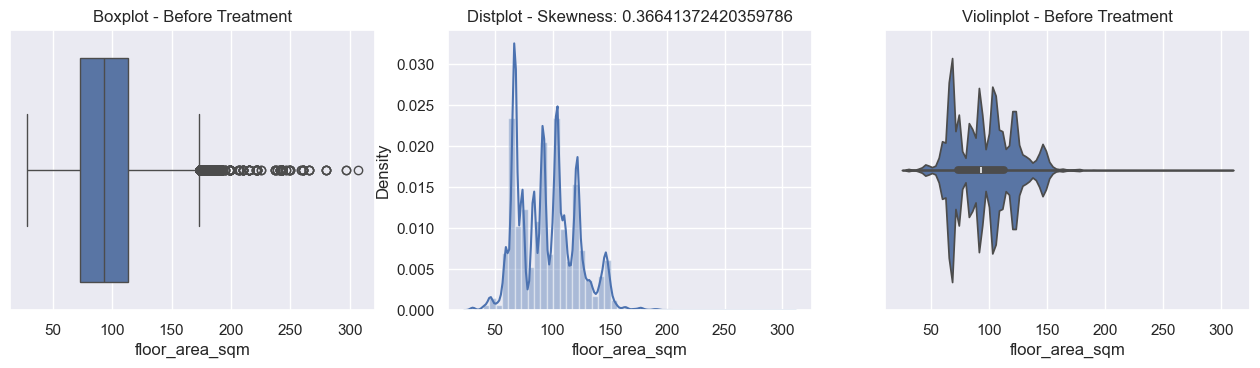

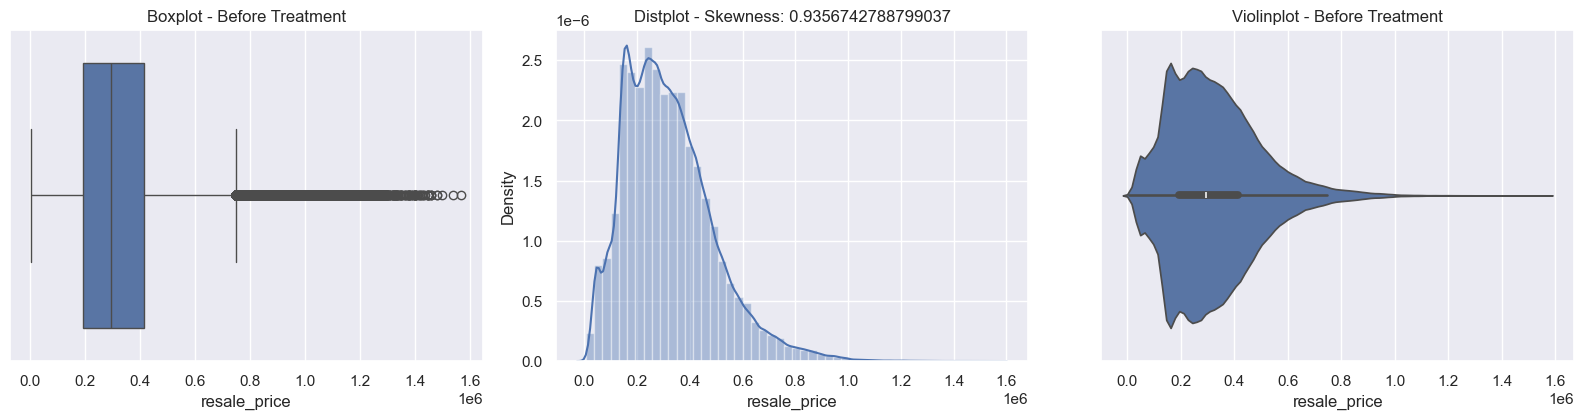

In [16]:
numerical_columns = ['floor_area_sqm', 'resale_price']
skewness_plot(df, *numerical_columns)

In [17]:
def Square_Root_Transformation(df, *column):

    for col_name in column:
        df[col_name + '_sqrt'] = np.sqrt(df[col_name])
        
    column = [i for i in df.columns if 'sqrt' in i]

    return skewness_plot(df, *column)

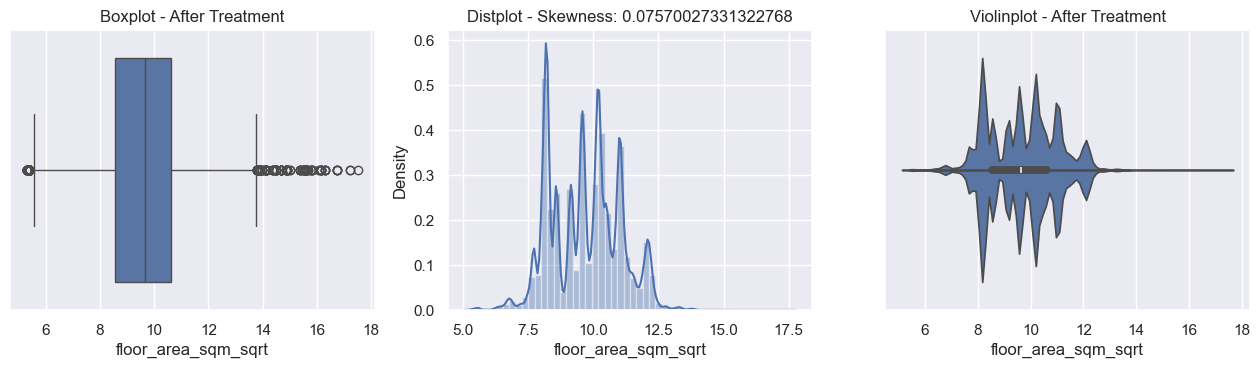

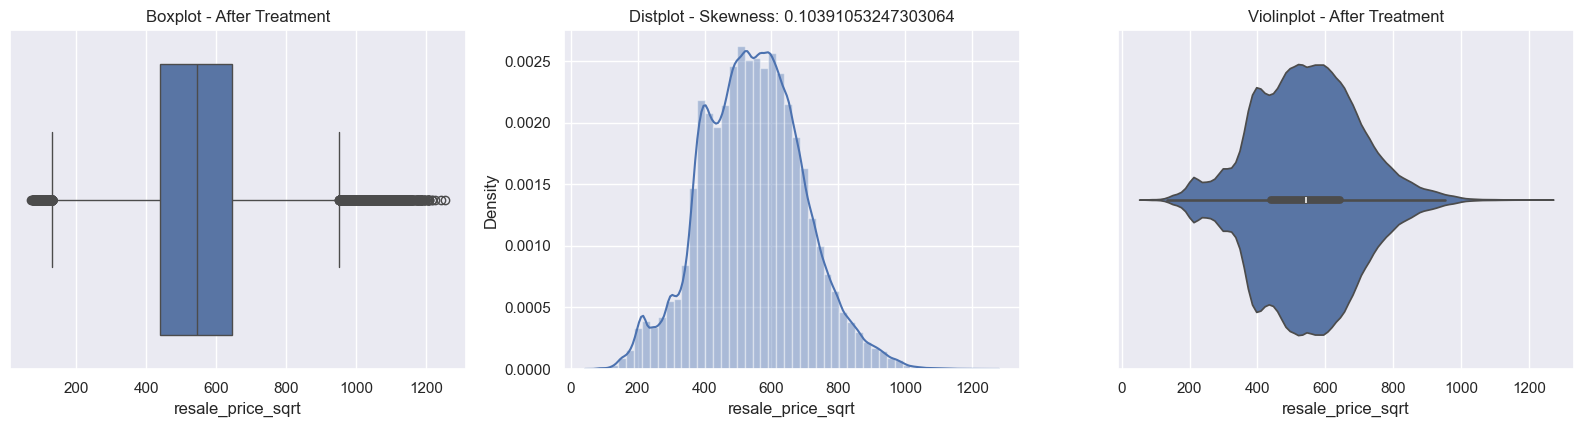

In [18]:
Square_Root_Transformation(df, *numerical_columns)

In [19]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,minimum_storey,maximum_storey,floor_area_sqm_sqrt,resale_price_sqrt
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,Not Specified,1990,10,12,5.567764,94.868330
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,Not Specified,1990,4,6,5.567764,77.459667
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,Not Specified,1990,10,12,5.567764,89.442719
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,Not Specified,1990,7,9,5.567764,77.459667
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,Not Specified,1990,4,6,8.544004,217.255610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923174,4,YISHUN,5 ROOM,502D,YISHUN ST 51,07 TO 09,112.0,IMPROVED,2018,725000.0,92 years 10 months,2024,7,9,10.583005,851.469318
923175,4,YISHUN,5 ROOM,647,YISHUN ST 61,07 TO 09,121.0,IMPROVED,1987,668888.0,62 years 01 month,2024,7,9,11.000000,817.855733
923176,4,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,APARTMENT,1992,1080000.0,67 years 03 months,2024,7,9,13.453624,1039.230485
923177,4,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,APARTMENT,1988,830000.0,63 years 04 months,2024,4,6,12.083046,911.043358


In [20]:
def outlier_plot(df):

    plt.figure(figsize=(16, 10))

    plt.subplot(2, 2, 1)
    sns.boxplot(x='floor_area_sqm', data=df)
    plt.title('Boxplot - floor area sqm')

    plt.subplot(2, 2, 2)
    sns.boxplot(x='floor_area_sqm_sqrt', data=df)
    plt.title('Boxplot - floor area sqm sqrt')

    plt.subplot(2, 2, 3)
    sns.boxplot(x='resale_price', data=df)
    plt.title('Boxplot - '+ 'resale price')

    plt.subplot(2, 2, 4)
    sns.boxplot(x='resale_price_sqrt', data=df)
    plt.title('Boxplot - '+ 'resale price sqrt')
    
    plt.tight_layout()
    
    return plt.show()

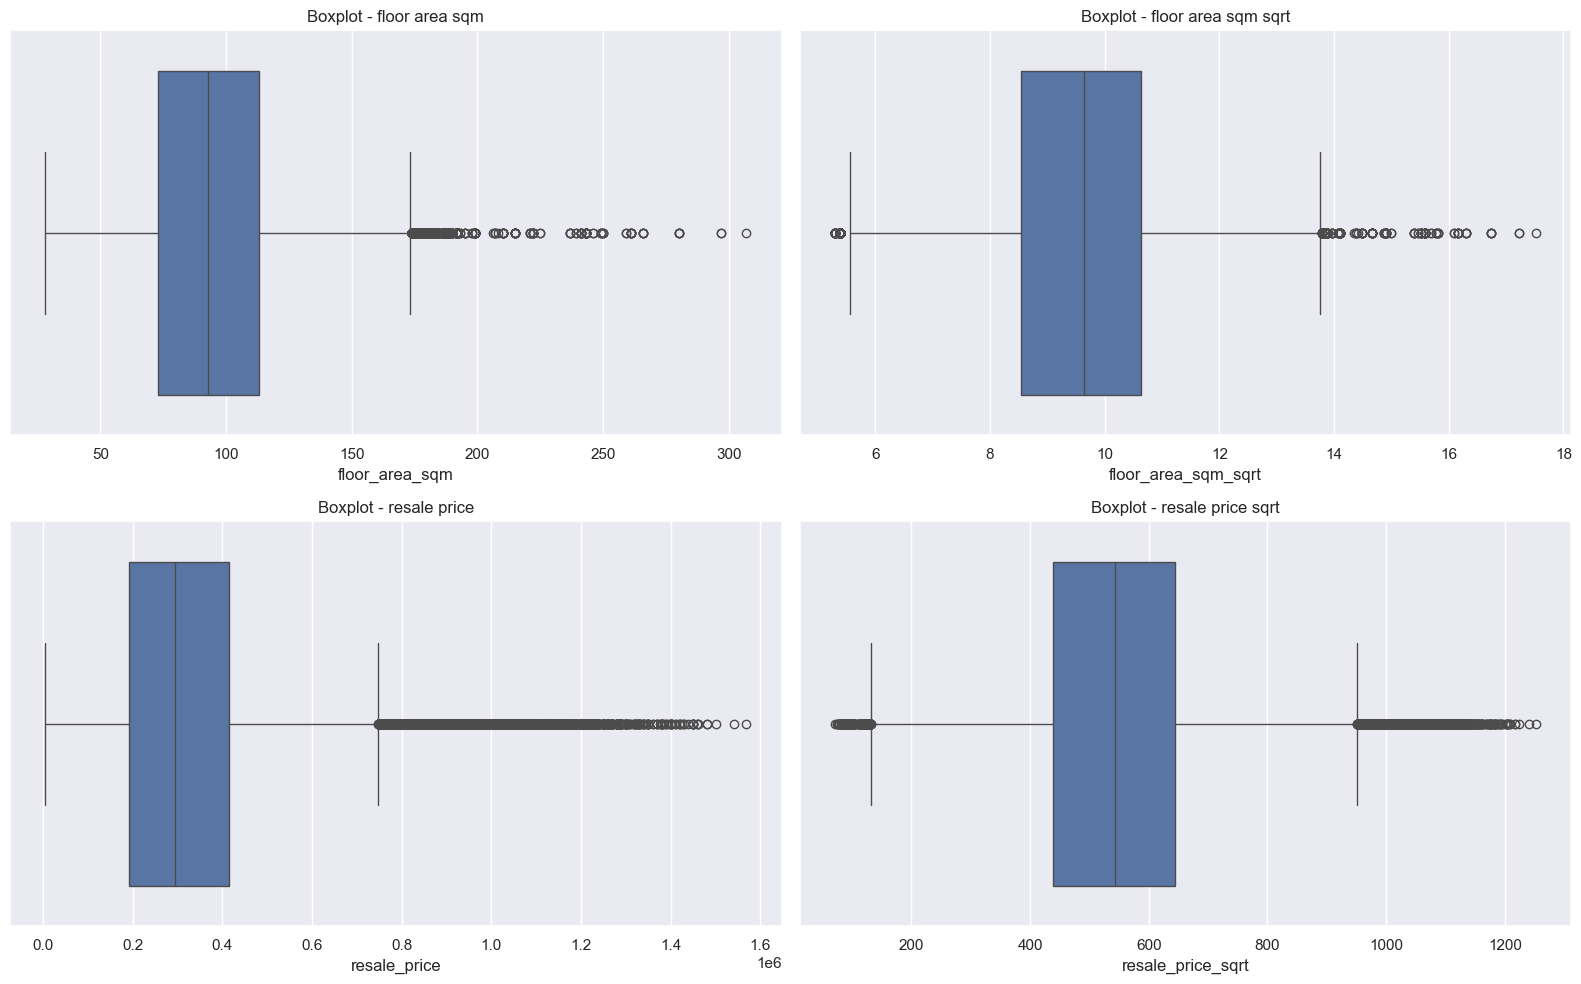

In [21]:
outlier_plot(df)

In [22]:
def outlier_quantile(df, *column):

    for col_name in column:
        percentile25 = df[col_name].quantile(0.25)
        percentile75 = df[col_name].quantile(0.75)
        iqr = percentile75 - percentile25

        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr

        df[col_name] = np.where(df[col_name] > upper_limit, upper_limit, df[col_name])
        df[col_name] = np.where(df[col_name] < lower_limit, lower_limit, df[col_name])

    return outlier_plot(df)

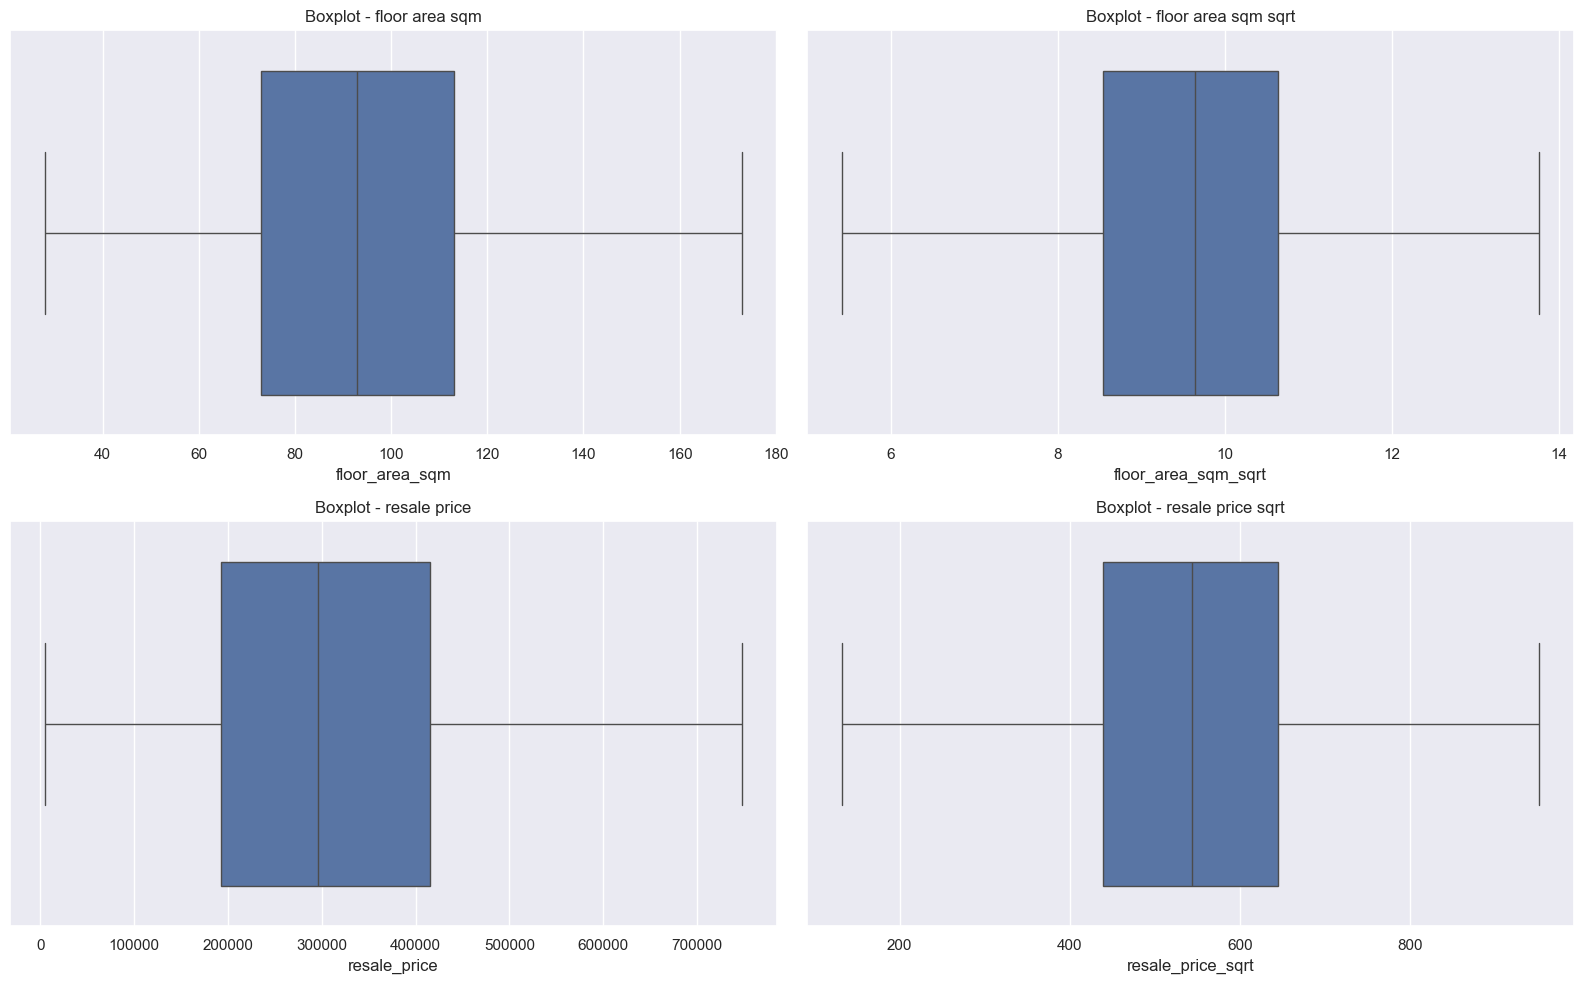

In [23]:
column_name = ['floor_area_sqm', 'floor_area_sqm_sqrt', 'resale_price', 'resale_price_sqrt']
outlier_quantile(df, *column_name)

In [24]:
df1 = df.copy()
df1['remaining_lease'] = df1['remaining_lease'].astype(str)
df1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,minimum_storey,maximum_storey,floor_area_sqm_sqrt,resale_price_sqrt
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,Not Specified,1990,10,12,5.567764,131.986727
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,Not Specified,1990,4,6,5.567764,131.986727
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,Not Specified,1990,10,12,5.567764,131.986727
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,Not Specified,1990,7,9,5.567764,131.986727
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,Not Specified,1990,4,6,8.544004,217.255610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923174,4,YISHUN,5 ROOM,502D,YISHUN ST 51,07 TO 09,112.0,IMPROVED,2018,725000.0,92 years 10 months,2024,7,9,10.583005,851.469318
923175,4,YISHUN,5 ROOM,647,YISHUN ST 61,07 TO 09,121.0,IMPROVED,1987,668888.0,62 years 01 month,2024,7,9,11.000000,817.855733
923176,4,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,173.0,APARTMENT,1992,748000.0,67 years 03 months,2024,7,9,13.453624,951.535862
923177,4,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,APARTMENT,1988,748000.0,63 years 04 months,2024,4,6,12.083046,911.043358


In [25]:
df1.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year', 'minimum_storey', 'maximum_storey',
       'floor_area_sqm_sqrt', 'resale_price_sqrt'],
      dtype='object')

<Axes: >

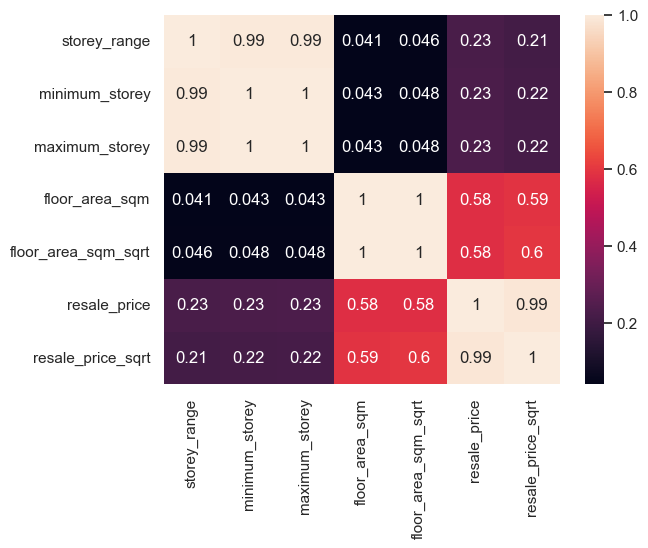

In [29]:
col = ['storey_range', 'minimum_storey', 'maximum_storey', 'floor_area_sqm', 'floor_area_sqm_sqrt', 'resale_price', 'resale_price_sqrt']
df_heatmap = df1[col].corr()
sns.heatmap(df_heatmap, annot=True)

In [30]:
df1.drop(['storey_range', 'floor_area_sqm', 'resale_price'], axis=1, inplace=True)
df1

,month,town,flat_type,block,street_name,flat_model,lease_commence_date,remaining_lease,year,minimum_storey,maximum_storey,floor_area_sqm_sqrt,resale_price_sqrt
0,1,0.0,0.0,829.0,13.0,5.0,1977,724.0,1990,10,12,5.567764,131.986727
1,1,0.0,0.0,829.0,13.0,5.0,1977,724.0,1990,4,6,5.567764,131.986727
2,1,0.0,0.0,829.0,13.0,5.0,1977,724.0,1990,10,12,5.567764,131.986727
3,1,0.0,0.0,829.0,13.0,5.0,1977,724.0,1990,7,9,5.567764,131.986727
4,1,0.0,2.0,447.0,13.0,12.0,1976,724.0,1990,4,6,8.544004,217.255610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
923174,4,26.0,4.0,1490.0,571.0,5.0,2018,659.0,2024,7,9,10.583005,851.469318
923175,4,26.0,4.0,1874.0,572.0,5.0,1987,259.0,2024,7,9,11.000000,817.855733
923176,4,26.0,5.0,1891.0,556.0,3.0,1992,327.0,2024,7,9,13.453624,951.535862
923177,4,26.0,5.0,902.0,561.0,3.0,1988,275.0,2024,4,6,12.083046,911.043358


In [27]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

# Specify categorical column names for ordinal encoding
cols = ['town', 'flat_type', 'block', 'street_name', 'flat_model', 'remaining_lease', 'storey_range']

unique_value = {}
for col in cols:
    data = df1[col].unique()
    data.sort()

    df1[col] = enc.fit_transform(df1[[col]])

    globals()[col] = {}
    for i in df1[col].unique():
        globals()[col][data[int(i)]] = i
        unique_value[f'{col}'] = globals()[col]

In [28]:
import json

with open('Category_Columns_Encoded_Data.json', 'w') as file:
    json.dump(unique_value, file , indent = 4)

In [31]:
df1.describe()

,month,town,flat_type,block,street_name,flat_model,lease_commence_date,remaining_lease,year,minimum_storey,maximum_storey,floor_area_sqm_sqrt,resale_price_sqrt
count,923179.000000,923179.000000,923179.000000,923179.000000,923179.000000,923179.000000,923179.000000,923179.000000,923179.000000,923179.000000,923179.000000,923179.000000,923179.000000
mean,6.558692,13.650879,3.013756,1117.834302,285.952899,8.991942,1988.234907,653.736467,2006.091629,6.678328,8.693142,9.692478,544.681990
std,3.418604,8.797073,0.948489,773.402806,181.616066,3.862931,10.619891,153.229478,9.266755,4.817270,4.817276,1.320598,149.660665
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1966.000000,0.000000,1990.000000,1.000000,3.000000,5.414791,131.986727
25%,4.000000,5.000000,2.000000,430.000000,122.000000,5.000000,1981.000000,724.000000,1999.000000,4.000000,6.000000,8.544004,439.317653
50%,7.000000,13.000000,3.000000,1063.000000,278.000000,8.000000,1986.000000,724.000000,2005.000000,7.000000,9.000000,9.643651,543.874986
75%,10.000000,23.000000,4.000000,1754.000000,460.000000,12.000000,1996.000000,724.000000,2013.000000,10.000000,12.000000,10.630146,644.204936
max,12.000000,26.000000,6.000000,2706.000000,583.000000,20.000000,2022.000000,724.000000,2024.000000,49.000000,51.000000,13.759359,951.535862


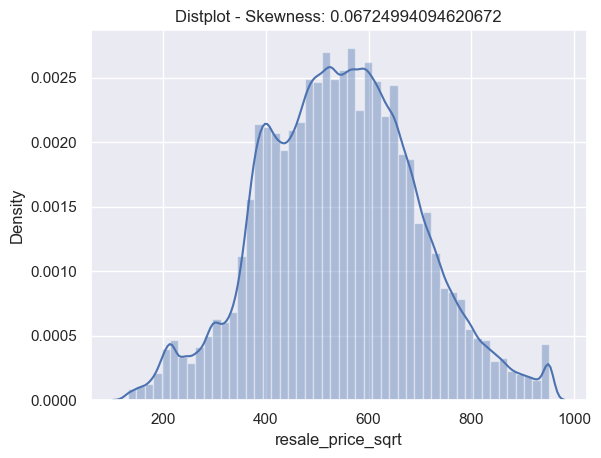

In [32]:
sns.distplot(df1['resale_price_sqrt'])
plt.title(f'Distplot - Skewness: {skew(df['resale_price_sqrt'])}')
plt.show()

In [33]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
class regression:

    def __init__(self, x, y):
        
        self.models =[('AdaBoost Regressor', AdaBoostRegressor()),
                      ('GradientBoosting Regressor', GradientBoostingRegressor()),
                      ('HistGradientBoosting Regressor', HistGradientBoostingRegressor()),
                      ('DecisionTree Regressor', DecisionTreeRegressor()),
                      ('XGB Regressor', XGBRegressor()),
                      ('Linear Regression', LinearRegression()),
                      ('KNeighbors Regressor', KNeighborsRegressor()),
                      ]
        
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.2, random_state = 42)
    
    def all_model(self):
        
        print(self.x_train.shape, self.x_test.shape, self.y_train.shape, self.y_test.shape)
        
        result = []
        
        for model_name, model in self.models:
            model.fit(self.x_train, self.y_train)
            y_test_pred = model.predict(self.x_test)
            y_train_pred = model.predict(self.x_train)
            
            data ={'Model_Name': model_name,
                   'Train_Mean_Square_Error': round(mean_squared_error(self.y_train, y_train_pred),4),
                   'Test_Mean_Square_Error': round(mean_squared_error(self.y_test, y_test_pred),4),
                   'Train_Mean_Absolute_Error': round(mean_absolute_error(self.y_train, y_train_pred),4),
                   'Test_Mean_Absolute_Error': round(mean_absolute_error(self.y_test, y_test_pred),4),
                   'Train_R2_Score': round(r2_score(self.y_train, y_train_pred ),4),
                   'Test_R2_Score': round(r2_score(self.y_test, y_test_pred), 4)}
            print(model_name)
            
            result.append(data)
            
        self.model_score_df = pd.DataFrame(result)

        return self.model_score_df

In [35]:
x = df1.drop(['resale_price_sqrt'], axis =1)
y = df1['resale_price_sqrt']

In [36]:
df1.tail()

,month,town,flat_type,block,street_name,flat_model,lease_commence_date,remaining_lease,year,minimum_storey,maximum_storey,floor_area_sqm_sqrt,resale_price_sqrt
923174,4,26.0,4.0,1490.0,571.0,5.0,2018,659.0,2024,7,9,10.583005,851.469318
923175,4,26.0,4.0,1874.0,572.0,5.0,1987,259.0,2024,7,9,11.000000,817.855733
923176,4,26.0,5.0,1891.0,556.0,3.0,1992,327.0,2024,7,9,13.453624,951.535862
923177,4,26.0,5.0,902.0,561.0,3.0,1988,275.0,2024,4,6,12.083046,911.043358
923178,4,26.0,5.0,911.0,563.0,7.0,1988,275.0,2024,4,6,12.083046,938.083152


In [34]:
regression_models = regression(x,y)
r_models = regression_models.all_model()
r_models

(738543, 12) (184636, 12) (738543,) (184636,)
AdaBoost Regressor
GradientBoosting Regressor
HistGradientBoosting Regressor
DecisionTree Regressor
XGB Regressor
Linear Regression
KNeighbors Regressor


,Model_Name,Train_Mean_Square_Error,Test_Mean_Square_Error,Train_Mean_Absolute_Error,Test_Mean_Absolute_Error,Train_R2_Score,Test_R2_Score
0,AdaBoost Regressor,3963.7773,3965.9626,50.7726,50.7602,0.8229,0.8236
1,GradientBoosting Regressor,1445.9185,1448.0311,28.1133,28.1415,0.9354,0.9356
2,HistGradientBoosting Regressor,626.0227,626.0882,18.7344,18.7412,0.9720,0.9722
3,DecisionTree Regressor,4.1622,615.4371,0.3166,17.3504,0.9998,0.9726
4,XGB Regressor,395.3698,402.7975,14.8594,14.9834,0.9823,0.9821
5,Linear Regression,4331.7570,4328.5141,51.7722,51.6962,0.8064,0.8075
6,KNeighbors Regressor,1567.8225,2473.3703,29.0823,36.7080,0.9299,0.8900


Lowest Test MSE and MAE:
-----------------------
DecisionTreeRegressor has the lowest test MSE and MAE, suggesting good performance in terms of minimizing prediction errors.

High R-squared (R2) Score:
-------------------------
Models like GradientBoostingRegressor, HistGradientBoostingRegressor, and XGBRegressor have high R2 scores, indicating a good ability to explain the variance in the resale prices.
#R2 - measures the proportion of the variance in the dependent variable that is predictable from the independent variables

Among GradientBoostingRegressor, HistGradientBoostingRegressor, and XGBRegressor, XGBRegressor is often considered the best choice due to its superior performance, efficiency, and flexibility in handling diverse datasets.

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((738543, 12), (184636, 12), (738543,), (184636,))

In [ ]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
data ={'Train_Mean_Square_Error': round(mean_squared_error(y_train, y_train_pred),4),
       'Test_Mean_Square_Error': round(mean_squared_error(y_test, y_test_pred),4)
      }
print(data)

In [34]:
# XGBRegressor 
model = XGBRegressor()
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
data ={'Train_Mean_Square_Error': round(mean_squared_error(y_train, y_train_pred),4),
       'Test_Mean_Square_Error': round(mean_squared_error(y_test, y_test_pred),4)
      }
print(data)

{'Train_Mean_Square_Error': 395.3698, 'Test_Mean_Square_Error': 402.7975}


In [36]:
# Hyperparameter tuning for XGBRegressor
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [2, 3, 4, 5, 6],
    'n_estimators': [50, 100, 200]
}

xgb_reg = XGBRegressor()

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid_search.fit(x_train, y_train)

best_params = grid_result.best_params_
best_model = grid_result.best_estimator_

y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')
best_params

Mean Squared Error on Test Set: 443.0335757167851


{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

In [39]:
# XBGRegressore with hyperparameter
xgb_model = XGBRegressor(learning_rate = 0.1, max_depth = 12, n_estimators = 300)

xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score ={'R2': r2,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse}

print(score)

{'R2': 0.988461771332184, 'Mean Absolute Error': 11.690840578289894, 'Mean Squared Error': 259.45930949966885, 'Root Mean Squared Error': 16.107740670238915}


In [37]:
pprint.pprint(score)

{'Mean Absolute Error': 11.690840578289894,
 'Mean Squared Error': 259.45930949966885,
 'R2': 0.988461771332184,
 'Root Mean Squared Error': 16.107740670238915}


In [54]:
# DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
data ={
        'Train_Mean_Square_Error': round(mean_squared_error(y_train, y_train_pred),4),
        'Test_Mean_Square_Error': round(mean_squared_error(y_test, y_test_pred),4)}
print(data)

{'Train_Mean_Square_Error': 4.1622, 'Test_Mean_Square_Error': 615.7128}


In [55]:
# Hyperparameter tuning for DecisionTreeRegressor
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

tree_reg = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(estimator=tree_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid_search.fit(x_train, y_train)

best_params = grid_result.best_params_
best_model = grid_result.best_estimator_

y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')
print(best_model, best_params)

Mean Squared Error on Test Set: 477.64562055196285
DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=20, random_state=42) {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 20}


In [40]:
# DecisionTreeRegressor with Hyperparameter
decision_tree_model = DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10, random_state=42)
decision_tree_model.fit(x_train, y_train)
y_pred = decision_tree_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score ={'R2': r2,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse}
print(score)

{'R2': 0.9783865205138942, 'Mean Absolute Error': 15.371988993944246, 'Mean Squared Error': 486.02074242057506, 'Root Mean Squared Error': 22.045878127681263}


In [38]:
pprint.pprint(score)

{'Mean Absolute Error': 15.371988993944246,
 'Mean Squared Error': 486.02074242057506,
 'R2': 0.9783865205138942,
 'Root Mean Squared Error': 22.045878127681263}


In [42]:
# Resale Price Prediction
data = np.array([[1, 0.0, 2.0, 447.0, 13.0, 12.0, 1976, 724.0, 1990, 4, 6, 8.544004]])
print('Actual Price: $', 217.255610**2)
print('XGBRegressor -> Resale Price: $', xgb_model.predict(data)[0]**2)
print('DecisionTreeRegressor -> Resale Price: $', decision_tree_model.predict(data)[0]**2)

Actual Price: $ 47200.0000764721
XGBRegressor -> Resale Price: $ 44021.62451428012
DecisionTreeRegressor -> Resale Price: $ 39669.915774719084


In [41]:
# Resale Price Prediction
data = np.array([[1, 0.0, 0.0, 829.0, 13.0, 5.0, 1977, 724.0, 1990, 10, 12, 5.567764]])
print('Actual Price: $', 131.986727**2)
print('XGBRegressor -> Resale Price : $', xgb_model.predict(data)[0]**2)
print('DecisionTreeRegressor -> Resale Price : $', decision_tree_model.predict(data)[0]**2)

Actual Price: $ 17420.49610417253
XGBRegressor -> Resale Price : $ 16992.735205807025
DecisionTreeRegressor -> Resale Price : $ 17420.49618865867


In [44]:
# Resale Price Prediction
data = np.array([[4, 26.0, 4.0, 1490.0, 571.0, 5.0, 2018, 659.0, 2024, 7, 9, 10.583005]])
print('Actual Price: $', 851.469318**2)
print('XGBRegressor -> Resale Price : $', xgb_model.predict(data)[0]**2)
print('DecisionTreeRegressor -> Resale Price : $', decision_tree_model.predict(data)[0]**2)

Actual Price: $ 724999.9994953852
XGBRegressor -> Resale Price : $ 722065.2082550563
DecisionTreeRegressor -> Resale Price : $ 707956.1889825744


In [45]:
# Resale Price Prediction
data = np.array([[4, 26.0, 4.0, 1874.0, 572.0, 5.0, 1987, 259.0, 2024, 7, 9, 11]])
print('Actual Price: $', 817.855733**2)
print('XGBRegressor -> Resale Price : $', xgb_model.predict(data)[0]**2)
print('DecisionTreeRegressor -> Resale Price : $', decision_tree_model.predict(data)[0]**2)

Actual Price: $ 668888.0000009673
XGBRegressor -> Resale Price : $ 665455.9292529859
DecisionTreeRegressor -> Resale Price : $ 684339.8513239869


In [46]:
# Resale Price Prediction
data = np.array([[4, 26.0, 5.0, 1891.0, 556.0, 3.0, 1992, 327.0, 2024, 7, 9, 13.453624]])
print('Actual Price: $', 951.535862**2)
print('XGBRegressor -> Resale Price : $', xgb_model.predict(data)[0]**2)
print('DecisionTreeRegressor -> Resale Price : $', decision_tree_model.predict(data)[0]**2)

Actual Price: $ 905420.4966720829
XGBRegressor -> Resale Price : $ 926002.4716800787
DecisionTreeRegressor -> Resale Price : $ 905420.4961886585


In [41]:
import pickle

with open('XGBRegressor_Cap6.pkl', 'wb') as file:
    pickle.dump(xgb_model, file) 